# Check max flow = 454.54526   (Monkaa = 23540.129)

In [4]:
import os
from ptlflow.utils.flow_utils import flow_read, flow_to_rgb
from ptlflow.utils.external.flowpy import replace_nans
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image


/opt/conda/envs/b2f/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[!!alt_cuda_corr is not compiled!!]


# Gopro

 61%|███████████████████████▊               | 2573/4206 [01:02<00:40, 40.69it/s]

002570


100%|███████████████████████████████████████| 4206/4206 [01:41<00:00, 41.33it/s]


210.29102


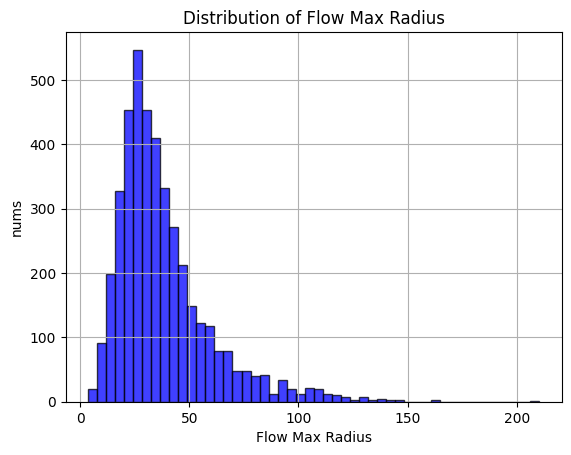

In [8]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming flow_read and replace_nans are defined functions
# from your existing codebase, e.g.,
# from your_module import flow_read, replace_nans

data_path = '/workspace/data/Gopro_my/train'
data_folder = os.listdir(data_path)
data_folder.sort()
master_max = 0
flow_max_radius_list = []

for scene in tqdm(data_folder, ncols=80):
    flow_path = os.path.join(data_path, scene, 'flow/flows', f'{scene}.flo')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    flow_max_radius_list.append(flow_max_radius)
    if flow_max_radius > master_max:
        master_max = flow_max_radius
    if flow_max_radius > 200:
        print(scene)


print(master_max)

# Plotting the histogram of flow_max_radius
plt.hist(flow_max_radius_list, bins=50, alpha=0.75, color='red', edgecolor='black')
plt.title('Distribution of Flow Max Radius')
plt.xlabel('Flow Max Radius')
plt.ylabel('nums')
plt.grid(True)
plt.show()


# Gopro

In [2]:
import os,glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

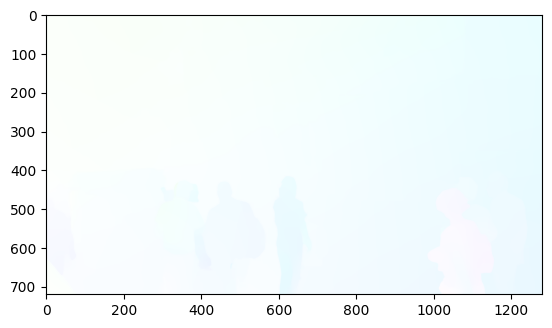

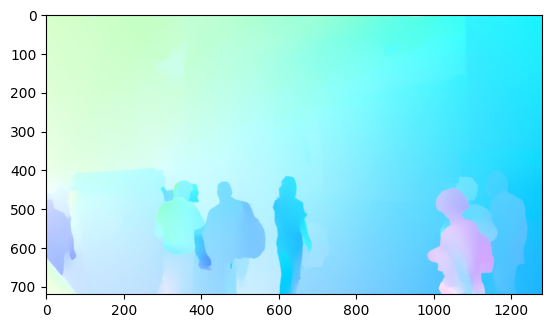

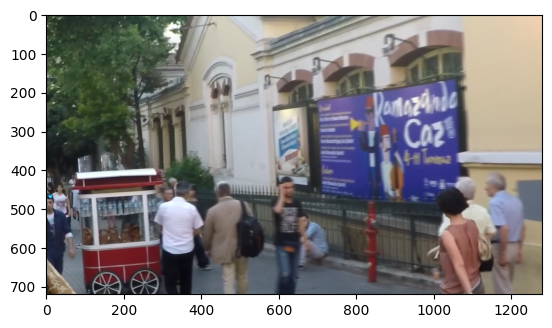

14.090754


In [6]:
gopro_path = '/workspace/data/Gopro_my/train'
gopro_folder = os.listdir(gopro_path)
gopro_folder.sort()

for scene in gopro_folder[3000:]:
    flow_path = os.path.join(gopro_path,scene,'flow/flows',f'{scene}.flo')
    flow = flow_read(flow_path)
    flow_rgb = flow_to_rgb(flow,flow_max_radius=150)
    flow_rgb_2 = flow_to_rgb(flow)
    blur_img = os.path.join(gopro_path,scene,'blur',f'{scene}.png')
    blur = Image.open(blur_img)
    plt.imshow(flow_rgb)
    plt.show()
    plt.imshow(flow_rgb_2)
    plt.show()
    plt.imshow(blur)
    plt.show()

    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    print(flow_max_radius)
    break